In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.cluster import KMeans
plt.style.use('ggplot')

In [2]:
## Read data
cabinet = pd.read_csv('../data_public/cabinetWrdMat10.csv', encoding='CP932', na_values='NA')

In [3]:
X = cabinet

In [4]:
num_vars = 20
U, S, V = np.linalg.svd(X)
eigvals = S**2 / np.cumsum(S)[-1]
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

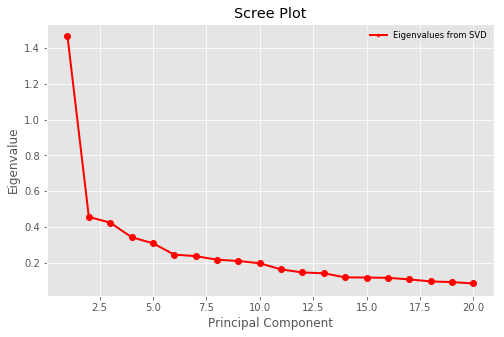

In [5]:
plt.plot(sing_vals, eigvals[0:20], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3,
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

In [6]:
## PCA
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

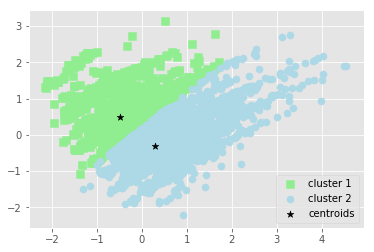

In [7]:
## K Means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
ypred = kmeans.fit_predict(X)
plt.scatter(X[ypred==0,0],
            X[ypred==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[ypred==1,0],
            X[ypred==1,1],
            s=50,
            c='lightblue',
            marker='o',
            label='cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=50,
            marker='*',
            c='black',
            label='centroids')
plt.legend()
plt.show()